# Analysis Ratings & Reviews NIVEA.de

## Notebook 3: First Steps With Spacy & Word Cloud

### Reading the data and importing useful modules

In [21]:
import pandas as pd
import spacy  # Library for Natural Language Processing
from collections import Counter
import warnings
import string
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import plotly.express as px  # For creating figures
import re # For working with regular expressions
import os # Provides functions for interacting with the operating system
warnings.filterwarnings('ignore')

reviews = pd.read_csv("reviews.csv", sep=';') # Reading the data

In [22]:
 # Removing the reviews that were submitted before 01/01/2019
reviews_filtered = reviews[reviews['date'] >= "2019-01-01"]

### Normalization

In [23]:
# Converting the reviews to lowercase
reviews_filtered['review_content_clean'] = reviews_filtered['review_content'].apply(lambda x: x.lower())

# Removing numbers from reviews
reviews_filtered['review_content_clean'] = reviews_filtered['review_content_clean'].apply(lambda x: re.sub('\w*\d\w*','', x))

# Removing punctuation marks & special characters
reviews_filtered['review_content_clean'] = reviews_filtered['review_content_clean'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation),' ', x))

### SpaCy Module

SpaCy is a free open-source library for Natural Language Processing

In [24]:
#!python -m spacy download de_core_news_sm
spacy_de = spacy.load('de_core_news_sm')

In [25]:
nlp = spacy.load('de_core_news_sm') # German package

### Tokenization

In [26]:
reviews_filtered['review_content_tokenized'] = reviews_filtered['review_content_clean'].apply(lambda x: nlp.tokenizer(x))
reviews_filtered['review_content_tokenized']

13113     (da, ich, das, produkt, erst,  , tage, habe, k...
13114     (ich, bin, total, enttäuscht, von, dem, neuen,...
13115     (es, ist, mittlerweile, das, einzige, sensitiv...
13116     (es, tut, mir, leid,  , aber, ich, kann, das, ...
13117     (ich, benutze, die, creme, soft, pflegedusche,...
                                ...                        
105807    (die, reinigungsmilch, ist, einfach, anzuwende...
105808    (ein, super, tolles, serum, daß, eine, leichte...
105809    (die, gesichtshaut, wird, sanft, gereinigt, un...
105810    (die, nivea, bodylotion, hat, eine, angenehme,...
105811    (das, serum, ist, toll, es, zieht, sehr, schne...
Name: review_content_tokenized, Length: 81685, dtype: object

### Top 10 all words

In [27]:
top_10_mit_stopwords = Counter(" ".join(reviews_filtered['review_content_tokenized'].astype(str)).split()).most_common(10)
top_10_mit_stopwords # Top 10 of all words

[('und', 124470),
 ('ich', 89689),
 ('die', 85464),
 ('der', 65018),
 ('ist', 63437),
 ('sehr', 62195),
 ('das', 55763),
 ('es', 49288),
 ('haut', 46778),
 ('ein', 43681)]

We learn that the majority of these words are so called stop words. Stop words are a set of commonly used words in a language (e.g. in German language "ist", "ein", "ich"  etc. are stop words)

### Applying the STOP WORDS filter

In [28]:
from  spacy.lang.de.stop_words import STOP_WORDS
stop_words = list(STOP_WORDS)

reviews_filtered['review_content_clean'] = reviews_filtered['review_content_clean'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
reviews_filtered['review_content_tokenized'] = reviews_filtered['review_content_clean'].apply(lambda x: nlp.tokenizer(x))

### Top 10 words without stop words

In [29]:
top_10_ohne_stopwords =Counter(" ".join(reviews_filtered['review_content_tokenized'].astype(str)).split()).most_common(10)
top_10_ohne_stopwords

[('haut', 46778),
 ('duft', 32486),
 ('angenehm', 20693),
 ('nivea', 18792),
 ('produkt', 17756),
 ('schnell', 17288),
 ('super', 16578),
 ('creme', 16482),
 ('zieht', 16418),
 ('fühlt', 13836)]

### Top 10 words related to 5-stars ratings

In [30]:
five_stars = reviews_filtered[reviews_filtered['review_score'] == 5]
five_count = Counter(" ".join(five_stars['review_content_tokenized'].astype(str)).split()).most_common(10)
five_count = pd.DataFrame (five_count, columns = ['word', 'count'])

In [31]:
five_count

,word,count
0,haut,36345
1,duft,23786
2,angenehm,15289
3,nivea,14135
4,super,13637
5,schnell,13525
6,zieht,13192
7,produkt,12725
8,creme,12398
9,fühlt,10975


### Top 10 words related to 1-star ratings

In [32]:
one_stars = reviews_filtered[reviews_filtered['review_score'] == 1]
one_count = Counter(" ".join(one_stars['review_content_tokenized'].astype(str)).split()).most_common(10)
one_count = pd.DataFrame (one_count, columns = ['word', 'count'])

In [33]:
one_count

,word,count
0,produkt,450
1,nivea,416
2,haut,338
3,duft,282
4,schade,235
5,quot,219
6,creme,174
7,enttäuscht,132
8,riecht,124
9,mal,121


### Stemming / Lemmatizing

In [34]:
reviews_filtered['review_content_lematized'] = reviews_filtered['review_content_tokenized'].apply(lambda x: ' '.join([token.lemma_
                                                                                                                     for token in list(nlp(x)) if (token.is_stop==False)]))

In [35]:
top_10_lemmatized_ohne_stopwords =Counter(" ".join(reviews_filtered['review_content_lematized'].astype(str)).split()).most_common(10)


### Top 10 lemmatized words without stop words

In [36]:
top_10_lemmatized_ohne_stopwords

[('haut', 46780),
 ('angenehm', 35933),
 ('duft', 32493),
 ('nivea', 18831),
 ('produkt', 17757),
 ('schnellen', 17547),
 ('fühlen', 16837),
 ('ziehen', 16718),
 ('super', 16580),
 ('creme', 16495)]

In [37]:
top_10_ohne_stopwords

[('haut', 46778),
 ('duft', 32486),
 ('angenehm', 20693),
 ('nivea', 18792),
 ('produkt', 17756),
 ('schnell', 17288),
 ('super', 16578),
 ('creme', 16482),
 ('zieht', 16418),
 ('fühlt', 13836)]

## Creating a Wordcloud 


In [38]:
#!pip install wordcloud
from wordcloud import WordCloud

#### Converting the list to a string

In [39]:
lemmatized_ohne_stopwords =(" ".join(reviews_filtered['review_content_lematized'].astype(str))) 

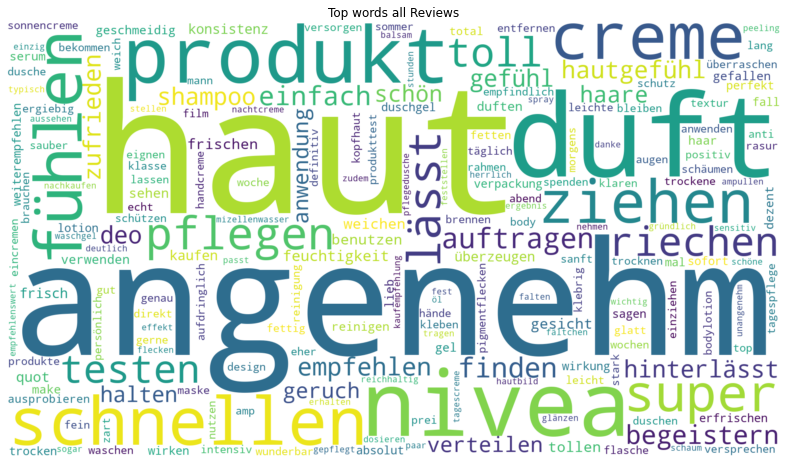

In [41]:
wordcloud_reviews = WordCloud(collocations=False, background_color="white",width=1920, height=1080).generate(lemmatized_ohne_stopwords)
plt.imshow(wordcloud_reviews, interpolation="bilinear")
plt.axis("off")
plt.rcParams['figure.figsize']=(18,8)
plt.title("Top words all Reviews")
plt.show()

### Dividing the review tokens in two categories: "positive reviews" (4-5 stars) and "negative reviews" (1-3 stars)

In [42]:
reviews_filtered["review_score_group"] = reviews_filtered.review_score.replace({1: "negativ", 2: "negativ", 3: "negativ", 4: "positiv", 5: "positiv" })
reviews_filtered["review_score_group"].value_counts()

positiv    76779
negativ     4906
Name: review_score_group, dtype: int64

In [43]:
negative_reviews = reviews_filtered.loc[(reviews_filtered["review_score_group"]=="negativ")] # Negative Reviews Filter
positive_reviews = reviews_filtered.loc[(reviews_filtered["review_score_group"]=="positiv")] # Positive Reviews Filter

In [44]:
negative_reviews_string =(" ".join(negative_reviews['review_content_lematized'])) 
positive_reviews_string =(" ".join(positive_reviews['review_content_lematized']))

### Word Cloud: Negative Reviews 

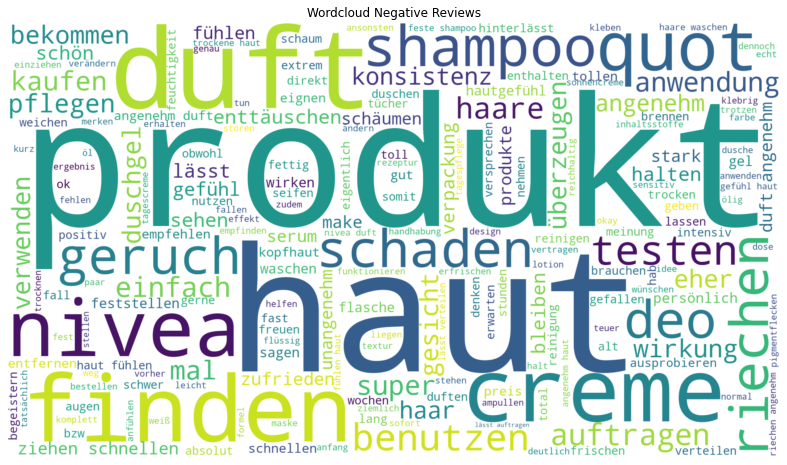

In [45]:
wordcloud_negative_reviews = WordCloud(background_color="white",width=1920, height=1080).generate(negative_reviews_string)

plt.imshow(wordcloud_negative_reviews, interpolation="bilinear")
plt.axis("off")
plt.rcParams['figure.figsize']=(18,8)
plt.title("Wordcloud Negative Reviews")
plt.show()

### Word Cloud: Positive Reviews 

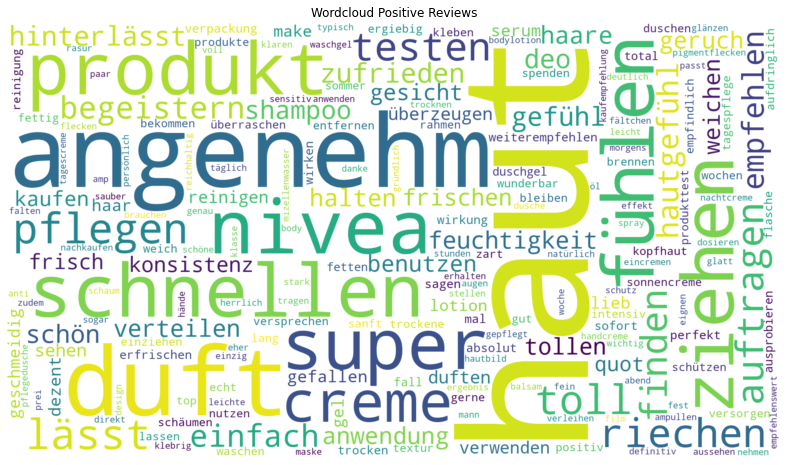

In [46]:
wordcloud_positive_reviews = WordCloud(collocations=False, background_color="white",width=1920, height=1080).generate(positive_reviews_string)
# "collocations=True" includes collocations (bigrams) of two words

plt.imshow(wordcloud_positive_reviews, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Positive Reviews")
plt.show()